# Option

In [1]:
import numpy as np;
import scipy as sc;
from matplotlib import pyplot as plt
import math;
%matplotlib inline

#### Function to calculate profit/loss of Options

In [2]:
def call_option(current_price, strike_price, premium):
    result = max(current_price-strike_price-premium,-premium)
    if(result!=-premium):
        print("Execise!")
    else:
        print("Don't execise")
    return result

##### Example 1: 
Pt = 150;

S = 100;

premium = 10

In [3]:
call_option(150,100,10)

Execise!


40

In [4]:
def put_option(current_price, strike_price, premium):
    result = max(strike_price-current_price-premium,-premium)
    if(result!=-premium):
        print("Execise!")
    else:
        print("Don't execise")
    return result

##### Example 2:
Pt = 100; 

S = 150; 

premium = 10

In [5]:
put_option(100, 150, 10)

Execise!


40

In [6]:
def call_put_parity(call_price, put_price, current_stock_price, strike_price, time, risk_free_rate, *dividend):
    if(not dividend):
        result = call_price + strike_price*math.exp(risk_free_rate*time)-(current_stock_price + put_price)
    else:
        result = call_price + strike_price*math.exp(risk_free_rate*time)+dividend[0]-(current_stock_price + put_price)
        
    if(result!=0):
        print("No abitrage!")
    else:
        print("Abitrage!")
    return math.fabs(result)

### Option Strategies

<ipython-input-57-4460c97c2344>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


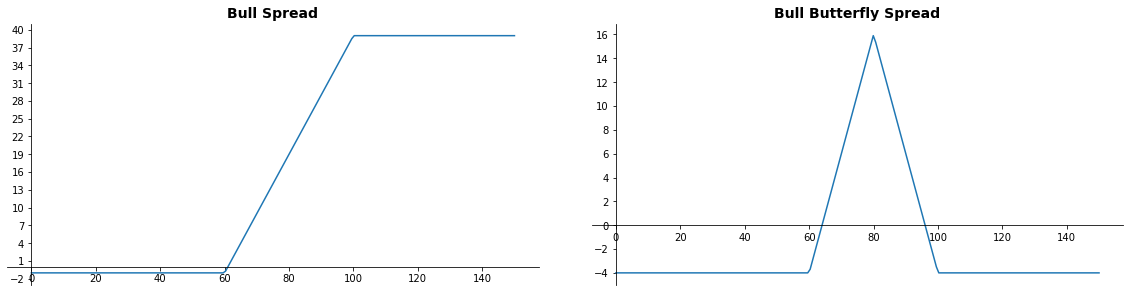

In [57]:
"""
1. Bull Spread
+ Hold 1 call option with strike price E1
+ Write 1 call option with strike price E3 (E3 > E1)

2. Bull Butterfly Spread
+ Hold 2 call options with strike prices E1, E3 (E3 > E1)
+ Write 2 call options with the strike price E2 = (E1+E3)/2
"""
cost = 1
E1 = 60
E3 = 100
E2 = (E1+E3)/2
St = np.linspace(0,150,200)
N = np.size(St)
y1 = np.maximum(np.zeros(N),St-E1) + np.maximum(np.zeros(N),St-E3) - 2*cost
y2 = 2*(-np.maximum(np.zeros(N),St-E2) - cost)

payoff1 = np.maximum(np.zeros(N),St-E1) - np.maximum(np.zeros(N),St-E3) - cost

payoff2 = y1 + y2

fig1 = plt.figure(figsize=(20,12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.1)

ax1 = plt.subplot(2,2,1)
ax1.plot(St,payoff1)
ax1.yaxis.set_ticks(np.arange(int(min(payoff1)-1),int(max(payoff1+2)),3)) #Change y tick
ax1.spines['left'].set_position(('data', 0))
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title("Bull Spread",fontsize = 14, fontweight = "bold")

ax2 = plt.subplot(2,2,2)
ax2.plot(St,payoff2)
ax2.yaxis.set_ticks(np.arange(int(min(payoff2)),int(max(payoff2))+2,2)) #Change y tick
ax2.spines['left'].set_position(('data', 0))
ax2.spines['bottom'].set_position(('data', 0))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title("Bull Butterfly Spread",fontsize = 14, fontweight = "bold")
fig1.show()

<ipython-input-58-a88bd9f711d4>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


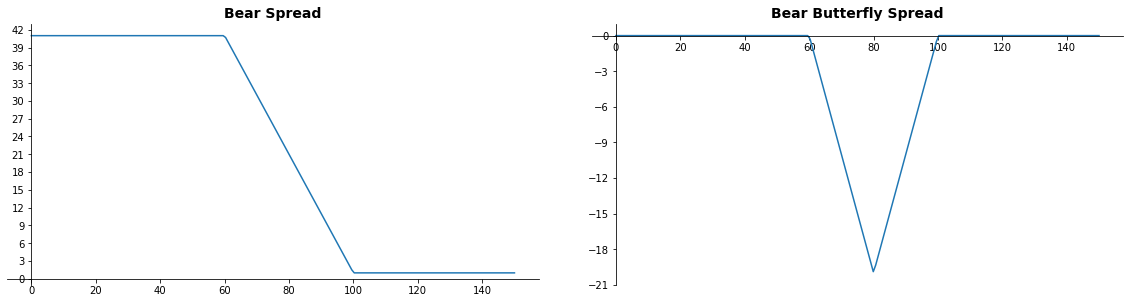

In [58]:
"""
1. Bear Spread
+ Write 1 put option with strike price E1
+ Hold 1 put option with strike price E3 (E3 > E1)

2. Bull Butterfly Spread
+ Write 2 put options with strike prices E1, E3 (E3 > E1)
+ Hold 2 put options with the strike price E2 = (E1+E3)/2
"""

cost = 1
E1 = 60
E3 = 100
E2 = (E1+E3)/2
St = np.linspace(0,150,200)
N = np.size(St)
y1 = np.maximum(np.zeros(N),E1-St) + np.maximum(np.zeros(N),E3-St) - 2*cost
y2 = 2*(-np.maximum(np.zeros(N),E2-St) + cost)

payoff1 = - np.maximum(np.zeros(N),E1-St) + np.maximum(np.zeros(N),E3-St) + cost

payoff2 = - y1 - y2

fig1 = plt.figure(figsize=(20,12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.1)

ax1 = plt.subplot(2,2,3)
ax1.plot(St,payoff1)
ax1.yaxis.set_ticks(np.arange(int(min(payoff1))-1,int(max(payoff1))+2,3)) #Change y tick
ax1.spines['left'].set_position(('data', 0))
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title("Bear Spread",fontsize = 14, fontweight = "bold")

ax2 = plt.subplot(2,2,4)
ax2.plot(St,payoff2)
ax2.yaxis.set_ticks(np.arange(int(min(payoff2))-2,int(max(payoff2))+2,3)) #Change y tick
ax2.spines['left'].set_position(('data', 0))
ax2.spines['bottom'].set_position(('data', 0))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title("Bear Butterfly Spread",fontsize = 14, fontweight = "bold")

fig1.show()

#### Black-Scholes model

**Inputs**

+ Strike price of the option

+ Price of the underlying

+ Time until expiration

+ Short-term interest rate

+ Dividends

+ Volatilities (Historical or Implied)